# 다중회귀 (Multiple Regression)

In [2]:
# 여러개의 특성 ( 독립변수 = 컬럼 = 항목 = 변수 모두 같은 의미)을 사용한 선형회귀 
# 특성이 많을 수록 복잡도가 높아짐 
# y = a* 특성1 + b* 특성2 + ... + 절편
# 기울기를 계속 곱한다 
# 특성이 많을 수록 복잡도가 높아진다 -> 특성이 많으면 다항 회귀를 쓰는 것이 좋다 

In [3]:
# 03_ 농어의 길이 높이 두께 데이터 파일읽어 들이기 
# 변수명 = df
import pandas as pd 

In [5]:
df = pd.read_csv("./data/03_농어의_길이_높이_두께_데이터.csv")
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [7]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [8]:
# 데이터프레임을 -> 2차원 배열로 변환하기 
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [12]:
import numpy as np

In [13]:
# 종속 변수 = 무게 
# 농어무게 
perch_weight = np.array(
                [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
                 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
                 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
                 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
                 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
                 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                 1000.0, 1000.0]
                 )

In [16]:
# 독립 변수 -> 2차원 
# 종속변수 -> 1차원 
# 데이터 분리하기 (훈련, 테스트) 7 : 3 으로 분리 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
                train_test_split(perch_full,perch_weight, test_size = 0.3, random_state= 42)

print(train_input.shape, train_target.shape)
print(test_input.shape,test_target.shape)

(39, 3) (39,)
(17, 3) (17,)


## 특성 만들기 : 특성공학이라고 칭한다  

In [17]:
# <특성 생성 패키지 및 라이브러리, 함수>
# 사용되는 패키지 : sklearn.preprocessing
# 사용되는 클래스 : PolynomialFeatures
# 사용되는 함수 : fit(), transform(), fit_transform()
# 사용되는 데이터 : train_input, test_inprt (target은 그대로 유지)


In [19]:
# 특성 만들기 예제 
from sklearn.preprocessing import PolynomialFeatures

# 객체 생성 
poly = PolynomialFeatures()

#임의 데이터 사용 
temp_data = [[2,3]]

#특성조합을 스스로 학습하여 찾기 
poly.fit(temp_data)

#스스로 찾은 특성 조합으로 변환하기 
poly.transform(temp_data)

# <특성 조합 패턴>
# - 최초 값은 : 선형 방정식 y절편 값을 가장 처음에 추가 
#             : 기본값 1을 사용 (선형 방정식 y절편의 기본값은 1 입니다 )
# - 두번째 ~ 세번째 값 ㅣ 자기자신 그래도 적용 
# - 네번째 값 : 각 특성을 제곱한 항목을 추가 (2^2)
# - 다섯번째 값 : 특성끼리 곱한 값 (2 * 3)
# - 여섯번째 값 : 각 특성을 제곱한 값 (3^2)

# 최초값인 y 절편 값 1은 보통 제외하고 진행함 

array([[1., 2., 3., 4., 6., 9.]])

In [20]:
# 특성 만드기 예시 (절편 제외 시키기)
poly = PolynomialFeatures(include_bias = False)
#특성 조합 찾기
poly.fit([[55, 12.49, 7.6]])
# 특성 조합으로 변환하기 
poly.transform([[55,12.49,7.6]])

array([[  55.    ,   12.49  ,    7.6   , 3025.    ,  686.95  ,  418.    ,
         156.0001,   94.924 ,   57.76  ]])

In [29]:
# trian data와 test data의 input데이터 특성 조합하여 생성하기

#특성을 추가한다는 의미 : 차원(degree)을 기준으로 생성하게됨 
# 기본적으로 사용되는차원은 2차원(2의 제곱승)을 사용하게 됨
#하이퍼파리미터 변수 : degree = 2 (디폴트 생략 가능)

# 객체 생성하기 
poly = PolynomialFeatures(degree = 2,include_bias = False)
#훈련시켜서 조합 찾아내기 
poly.fit(train_input)
# 훈련데이터를 특성조합으로 변환하여 생성하기 
train_poly = poly.transform(train_input)
train_poly
#테스트 데이터 변환하기 (동일한 훈련 조합을 사용해야함)
test_poly = poly.transform(test_input)
#차원확인 
print(train_poly.shape,train_target.shape)
print(test_poly.shape,test_target.shape)

(39, 9) (39,)
(17, 9) (17,)


In [30]:
## 특성 9개가 만들어진 계산 값확인하기 
print(poly.get_feature_names_out())
# print(poly.get_feature_names())


['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


## degree = 2 로 다중호귀 훈련하기 

In [31]:
# 훈련 모델  생성 
# 훈련 시키기
# 훈련 모델과 테스트 모델 검증하여 과적합 확인하기 

from sklearn.linear_model import LinearRegression

#훈련모델 생성
Ir = LinearRegression()

#훈련 시키기
Ir.fit(train_poly, train_target)

# 과적합 확인 -> 최적합 
print(Ir.score(train_poly, train_target))
print(Ir.score(test_poly, test_target))

0.9898271546307026
0.9713771600629739


### degree = 5로 훈련시켜보기

In [32]:
# 특성을 degree 5로 헤서 최종결과(과적합 여부) 확인하기 

In [36]:
# 객체 생성하기 
poly = PolynomialFeatures(degree = 5,include_bias = False)
#훈련시켜서 조합 찾아내기 
poly.fit(train_input)
# 훈련데이터를 특성조합으로 변환하여 생성하기 
train_poly = poly.transform(train_input)
train_poly
#테스트 데이터 변환하기 (동일한 훈련 조합을 사용해야함)
test_poly = poly.transform(test_input)
#차원확인 
print(train_poly.shape,train_target.shape)
print(test_poly.shape,test_target.shape)

(39, 55) (39,)
(17, 55) (17,)


In [37]:
## 특성 9개가 만들어진 계산 값확인하기 
print(poly.get_feature_names_out())
# print(poly.get_feature_names())


['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']


In [39]:
# 훈련 모델  생성 
# 훈련 시키기
# 훈련 모델과 테스트 모델 검증하여 과적합 확인하기 

from sklearn.linear_model import LinearRegression

#훈련모델 생성
Ir = LinearRegression()

#훈련 시키기
Ir.fit(train_poly, train_target)

# 과적합 확인 -> 완전한 과대적합 
# 훈련 모델을 좋으나 테스트 결과가 안 좋음 
print(Ir.score(train_poly, train_target))
print(Ir.score(test_poly, test_target))

#고개적합 발생
- 훈련모델은 매우 좋은 성능을 보이고 있지만 테스트 결과가 안 좋음 

# 과대 적합 해소 방법
# - 과재적합이 일어나지 않도록 제어하는 개념을 적용 : 규제라고 한다 
# - 규제의 개념을 적용한 훈련 모델에는 릿지(ridge)와 라쏘(lasso) 회귀 모델이 있다.
# (주로 릿지 모델을 선호하는 편이다)

## 규제(제어) 하는 방법
데이터의 특성들을 모두 정규화(표준화) 하여 처리함 

## 정규화 방법 
# - 일반적으로 스케일을 통일 시키기 위한 표준점수를 사용 
# - 정규화 클래스 생성 : StandardScaler(), MinMaxScaler()... 더 있음 
# - 훈련시키기 : fit(), 훈련데이터 사용 -> 표준 점수 생성 
# - 변환하기 : transform() 훈련데이터 사용 -> 표준점수로 변환 
# - 기본적으로 표준점수는 StandardScaler()를 사용한다
# (무엇으로 정규화 할지 모를 경우에는 StandardScaler을 사용하면 됨)

0.9999999999999838
-20.194780102190062


In [40]:
# <규제가 잘 적용된 향상 모델>
# [릿지모델]
# - 계수(선형 및 다항방정식에서 x 값을 제외한 값들)를 젝ㅂ한 기준으로 규제 적용
# - 사용 패키지 : from sklearn.linear_model
# -사용 클래스(모델) : Ridge 
# -훈련/평가/테스트 : fit(), score(), predict()

# [라쏘모델]
# - 계수(선형 및 다항방정식에서 x 값을 제외한 값들)를 젝ㅂ한 기준으로 규제 적용
# - 사용 패키지 : from sklearn.linear_model
# -사용 클래스(모델) : Lasso
# -훈련/평가/테스트 : fit(), score(), predict()

## 규제를 위해 데이터 정규화(표준화) 시키기

In [41]:
# 사용 라이브러리 불러들이기 
from sklearn.preprocessing import StandardScaler

#객체 생성하기 
ss =StandardScaler()

#훈련시키기 - 정규화 데이터 생성 
ss.fit(train_poly)

#생성된 정규화 데이터로 변환하기 
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


In [47]:
train_scaled
# 데이터가 -1~0 
print(train_scaled.shape, test_scaled.shape)
## 55 : 5의 제곱으로 만들어진 특성 들 

(39, 55) (17, 55)


## 릿지모델 훈련하기

In [49]:
#과적합 여부 확인하기 
from sklearn.linear_model import Ridge

rr = Ridge()

#훈련 모델 생성하기
rr.fit(train_scaled, train_target)

#훈련데이터로 훈련모델 평가하기 (결정계수)
print(rr.score(train_scaled,train_target))
print(rr.score(test_scaled,test_target))

0.9889900259477936
0.9806943210368348


In [50]:
# 규제강도를 높이는 방법 -> 알파라는 규제 강도를 높이는 하이퍼 파라미터가 존재한다 

# <규제강도 조절 하이퍼파라미터 : alpha>
# - 정의되지 않은 임의의 값을 이용하여 규제를 제어하는 방식 
# - 일반적으로 임의의 범위를 지정하여 범위 내 값들로 훈련 및 테스트의 과적합 확인 후 
#   가장 좋은 시점의 임의의 값을 사용하는 방식으로 한다 
# - 보통임의의 범위값으로는 0.001, 0.01, 0.1, 1, 10, 100의 범위를 주로 사용한다 

from sklearn.linear_model import Ridge

rr = Ridge(alpha = 0.1)

#훈련 모델 생성하기
rr.fit(train_scaled, train_target)

#훈련데이터로 훈련모델 평가하기 (결정계수)
print(rr.score(train_scaled,train_target))
print(rr.score(test_scaled,test_target))

0.9897983159614501
0.9842243738800773


## alpha 값 찾아보기 - 시각화 하여 찾는다

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


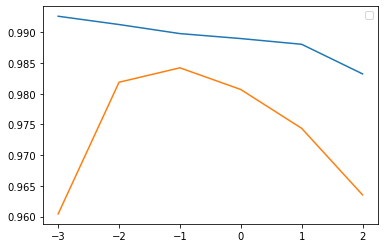

In [60]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

#임의의 alpha 범위 설정 
alpha_list = [0.001,0.01, 0.1, 1, 10, 100]

#반복하면서 그래프에 표시하기 
for alpha in alpha_list : 
    #모델에 적용하기 
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    #훈련점수와 테스트 점수를 저장하기 
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled,test_target))
    
#그래프 그리기 
#alpha_list 값을 x축 값으로 사용하기 위해 
# 동일한 간격으로 표시하기 위하여 지수로 변환하여 표시 
# 0.001dms wltnfh -1, 0은 1, 100은 2가 된다
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.legend()

plt.show()
#훈련데이터와 테스트 데이터가 가장 가까워지는 x축의 값을 alpha 값

# 라쏘 모델 사용하기 

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9891841592343474
0.9816966371762467


C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\ekdms\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.369e+02, toleranc

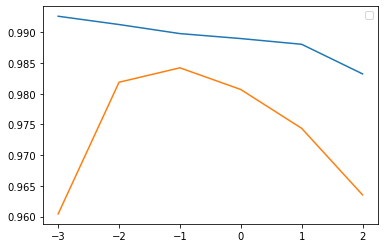

In [64]:
## 라쏘 모델도 alpha 값을 범위를 이용해서 최적의 알파 값을 결정한 후 훈렴 및 테스트 결과를 비교해 보세요 
alpha_list = [0.001,0.01,0.1,1,10,100]
train_s = []
test_s = []

for alpha in alpha_list :
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_s.append(lasso.score(train_scaled,train_target))
    test_s.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.legend()


In [65]:

lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9882059522438204
0.9834044009315154


## 무게 예측하기
##### - Ir, ridge, lasso 각각 모델로 예측해보기 

In [66]:
print(Ir.predict(test_ploy)) 
print(ridge.predict(test_scaled))
print(lasso.predict(test_scaled))

NameError: name 'test_ploy' is not defined